In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
house_prices = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")

In [3]:
house_prices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data dictionary


Data fields<br>
Here's a brief version of what you'll find in the data description file.<br>

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.<br>
MSSubClass: The building class<br>
MSZoning: The general zoning classification<br>
LotFrontage: Linear feet of street connected to property<br>
LotArea: Lot size in square feet<br>
Street: Type of road access<br>
Alley: Type of alley access<br>
LotShape: General shape of property<br>
LandContour: Flatness of the property<br>
Utilities: Type of utilities available<br>
LotConfig: Lot configuration<br>
LandSlope: Slope of property<br>
Neighborhood: Physical locations within Ames city limits<br>
Condition1: Proximity to main road or railroad<br>
Condition2: Proximity to main road or railroad (if a second is present)<Br>
BldgType: Type of dwelling<br>
HouseStyle: Style of dwelling<br>
OverallQual: Overall material and finish quality<br>
OverallCond: Overall condition rating<br>
YearBuilt: Original construction date<br>
YearRemodAdd: Remodel date<br>
RoofStyle: Type of roof<br>
RoofMatl: Roof material<br>
Exterior1st: Exterior covering on house<br>
Exterior2nd: Exterior covering on house (if more than one material)<br>
MasVnrType: Masonry veneer type<br>
MasVnrArea: Masonry veneer area in square feet<br>
ExterQual: Exterior material quality<br>
ExterCond: Present condition of the material on the exterior<br>
Foundation: Type of foundation<br>
BsmtQual: Height of the basement<br>
BsmtCond: General condition of the basement<br>
BsmtExposure: Walkout or garden level basement walls<br>
BsmtFinType1: Quality of basement finished area<br>
BsmtFinSF1: Type 1 finished square feet<br>
BsmtFinType2: Quality of second finished area (if present)<br>
BsmtFinSF2: Type 2 finished square feet<br>
BsmtUnfSF: Unfinished square feet of basement area<br>
TotalBsmtSF: Total square feet of basement area<br>
Heating: Type of heating<br>
HeatingQC: Heating quality and condition<br>
CentralAir: Central air conditioning<br>
Electrical: Electrical system<br>
1stFlrSF: First Floor square feet<br>
2ndFlrSF: Second floor square feet<br>
LowQualFinSF: Low quality finished square feet (all floors)<br>
GrLivArea: Above grade (ground) living area square feet<br>
BsmtFullBath: Basement full bathrooms<br>
BsmtHalfBath: Basement half bathrooms<br>
FullBath: Full bathrooms above grade<br>
HalfBath: Half baths above grade<br>
Bedroom: Number of bedrooms above basement level<br>
Kitchen: Number of kitchens<br>
KitchenQual: Kitchen quality<br>
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)<br>
Functional: Home functionality rating<br>
Fireplaces: Number of fireplaces<br>
FireplaceQu: Fireplace quality<br>
GarageType: Garage location<br>
GarageYrBlt: Year garage was built<br>
GarageFinish: Interior finish of the garage<br>
GarageCars: Size of garage in car capacity<br>
GarageArea: Size of garage in square feet<br>
GarageQual: Garage quality<br>
GarageCond: Garage condition<br>
PavedDrive: Paved driveway<br>
WoodDeckSF: Wood deck area in square feet<br>
OpenPorchSF: Open porch area in square feet<br>
EnclosedPorch: Enclosed porch area in square feet<br>
3SsnPorch: Three season porch area in square feet<br>
ScreenPorch: Screen porch area in square feet<br>
PoolArea: Pool area in square feet<br>
PoolQC: Pool quality<br>
Fence: Fence quality<br>
MiscFeature: Miscellaneous feature not covered in other categories<br>
MiscVal: $Value of miscellaneous feature<br>
MoSold: Month Sold<br>
YrSold: Year Sold<br>
SaleType: Type of sale<br>
SaleCondition: Condition of sale<br>


In [4]:
house_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
house_prices.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

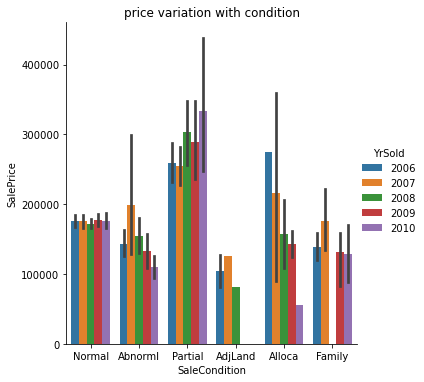

In [6]:
import seaborn as sns

sns.catplot(x="SaleCondition", y="SalePrice", kind="bar", hue='YrSold', data=house_prices)
plt.title("price variation with condition")
plt.show()

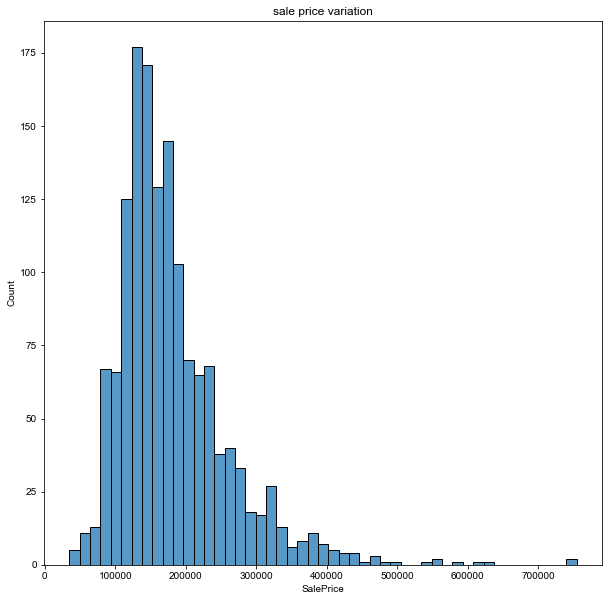

In [7]:
plt.figure(figsize=(10, 10))
sns.histplot(house_prices["SalePrice"])
sns.set_style("darkgrid")
plt.title("sale price variation");

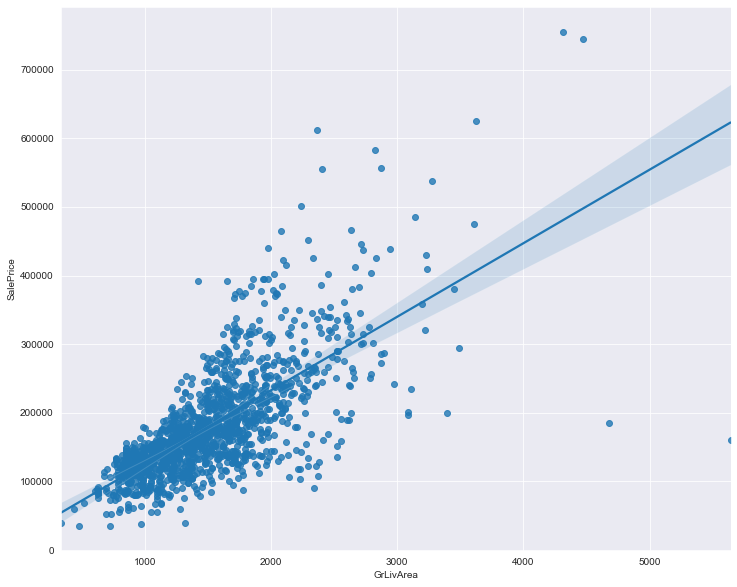

In [8]:
plt.figure(figsize=(12, 10))
sns.regplot(x=house_prices["GrLivArea"], y=house_prices["SalePrice"]);

# Heat map

In [9]:
corr_matrix = house_prices.corr()
corr_matrix

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


<AxesSubplot:>

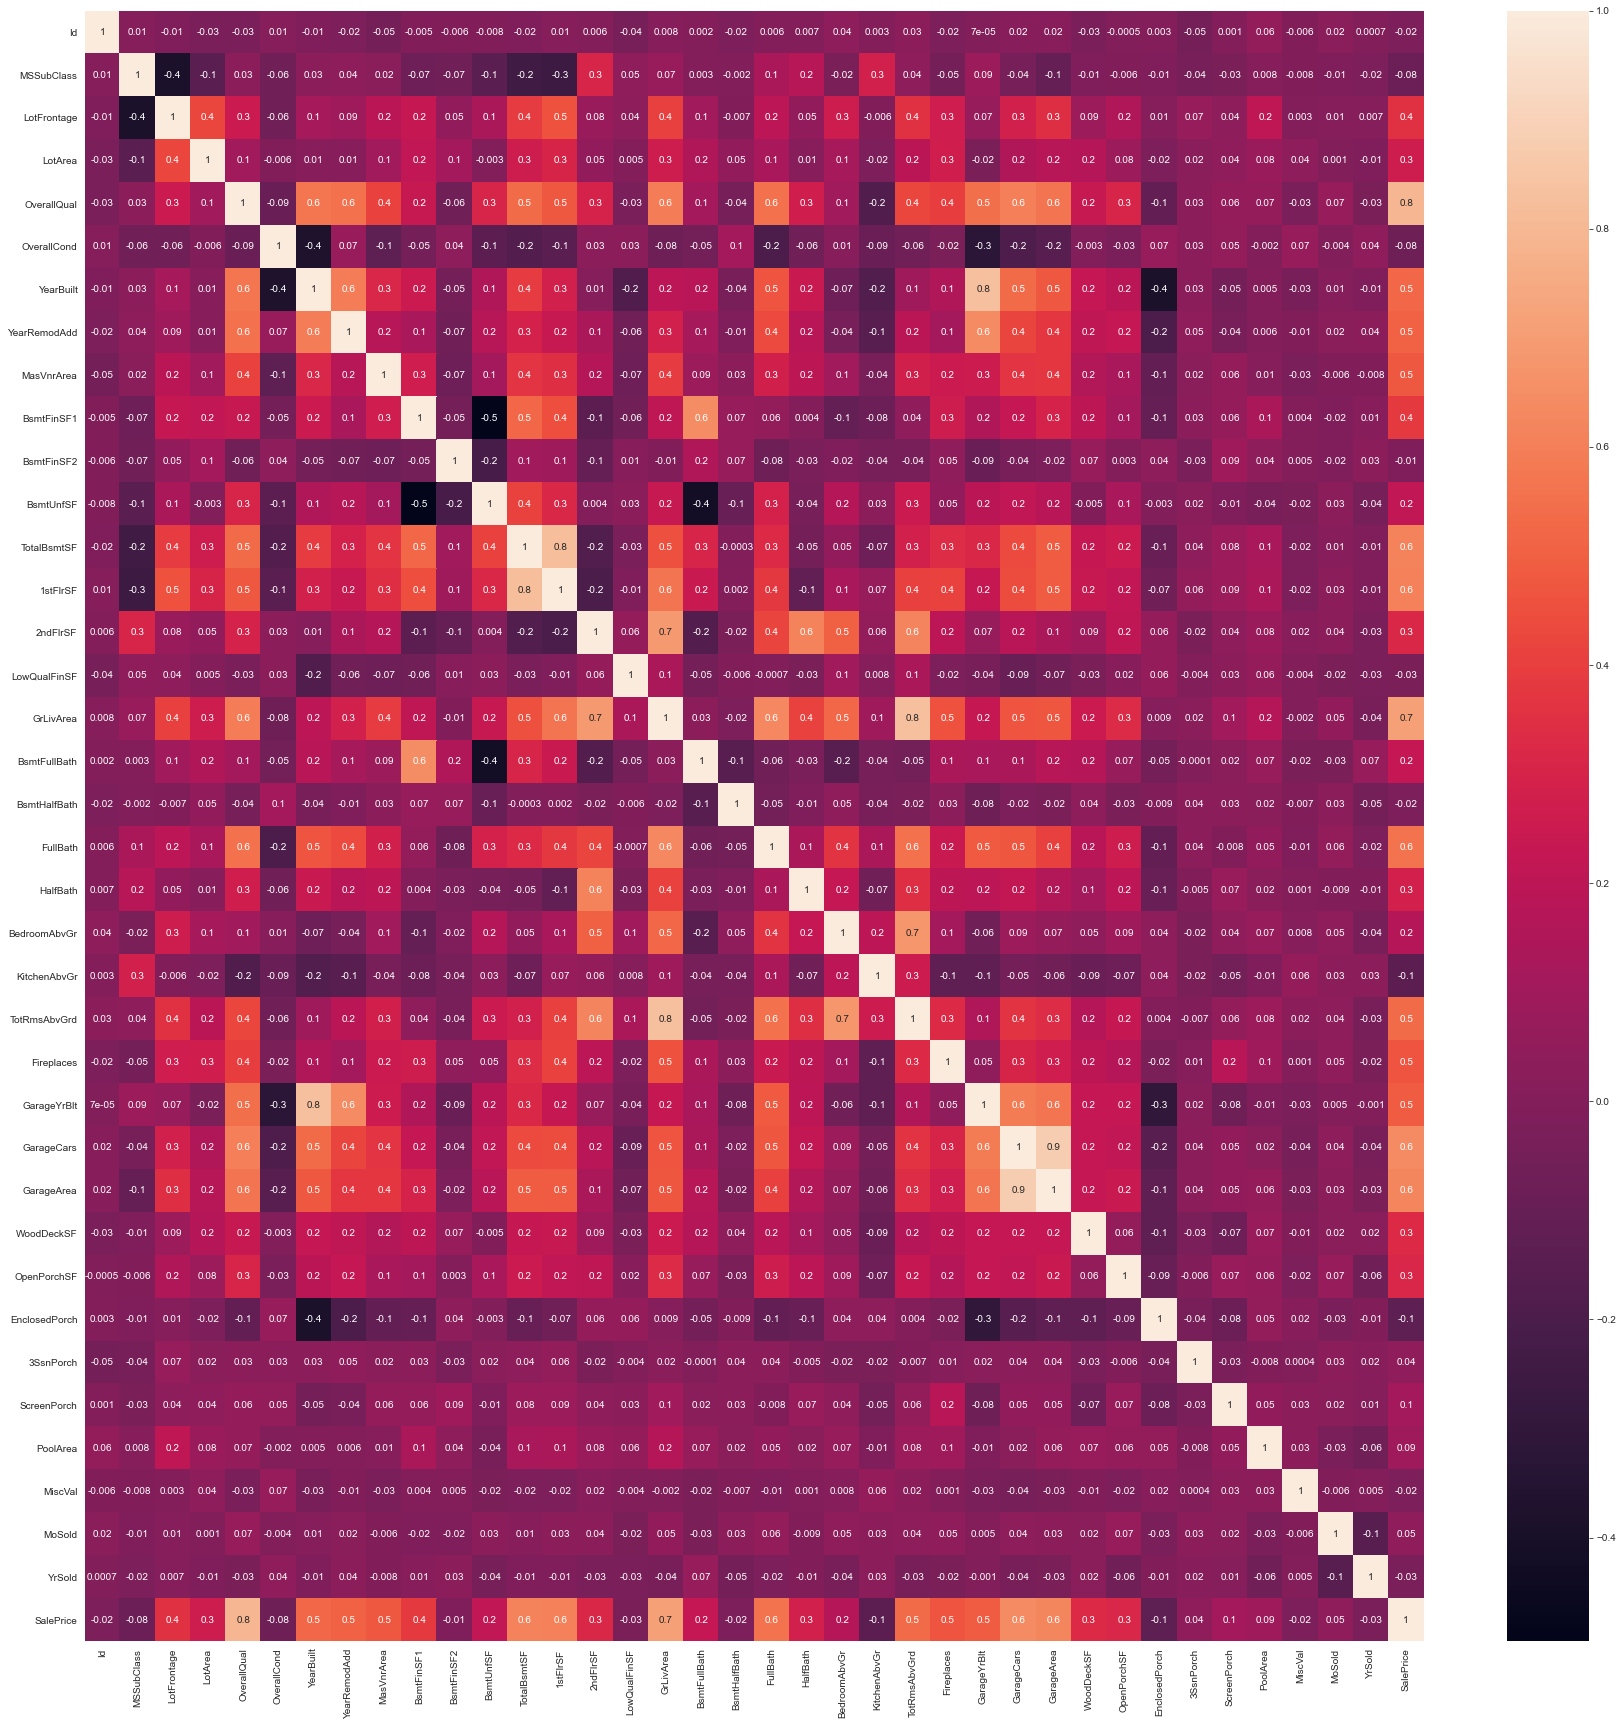

In [10]:
plt.figure(figsize=(30, 30))

sns.heatmap(corr_matrix, annot=True, fmt= '.1g')

In [11]:
house_prices = house_prices.drop('GarageYrBlt', axis=1)

In [12]:
house_prices["SaleCondition"].unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [13]:
house_prices["OverallQual"].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [14]:
house_prices["YearBuilt"].unique()

array([2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1929, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 1951, 1957, 1927, 1920, 1966, 1959, 1994, 1954, 1953, 1955,
       1983, 1975, 1997, 1934, 1963, 1981, 1964, 1999, 1972, 1921, 1945,
       1982, 1998, 1956, 1948, 1910, 1995, 1991, 2009, 1950, 1961, 1977,
       1985, 1979, 1885, 1919, 1990, 1969, 1935, 1988, 1971, 1952, 1936,
       1923, 1924, 1984, 1926, 1940, 1941, 1987, 1986, 2008, 1908, 1892,
       1916, 1932, 1918, 1912, 1947, 1925, 1900, 1980, 1989, 1992, 1949,
       1880, 1928, 1978, 1922, 1996, 2010, 1946, 1913, 1937, 1942, 1938,
       1974, 1893, 1914, 1906, 1890, 1898, 1904, 1882, 1875, 1911, 1917,
       1872, 1905], dtype=int64)

In [15]:
house_prices.isnull().sum().unique()

array([   0,  259, 1369,    8,   37,   38,    1,  690,   81, 1453, 1179,
       1406], dtype=int64)

In [16]:
house_prices.columns[house_prices.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')

In [17]:
house_prices["LotFrontage"] = house_prices["LotFrontage"].fillna(house_prices["LotFrontage"].median())

In [18]:
house_prices["LotFrontage"] = house_prices["LotFrontage"].astype(int)

In [19]:
house_prices = house_prices.drop("Alley", axis=1)

In [20]:
house_prices["BsmtQual"] = house_prices["BsmtQual"].fillna('Nan')

In [21]:
house_prices["BsmtCond"] = house_prices["BsmtCond"].fillna("Nan")

In [22]:
house_prices["BsmtExposure"] = house_prices["BsmtExposure"].fillna('Nan')

In [23]:
house_prices["BsmtFinType1"] = house_prices["BsmtFinType1"].fillna('Nan')

In [24]:
house_prices["BsmtFinType2"] = house_prices["BsmtFinType2"].fillna('Nan')

In [25]:
house_prices["Electrical"] = house_prices["Electrical"].fillna('Nan')

In [26]:
house_prices.isnull().sum().unique()

array([   0,    8,  690,   81, 1453, 1179, 1406], dtype=int64)

In [27]:
df = house_prices
df['GarageType'] = df['GarageType'].fillna("Nan")
df['GarageFinish'] = df['GarageFinish'].fillna("Nan")
df['GarageCond'] = df['GarageCond'].fillna('Nan')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   int32  
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [29]:
df['GarageQual'] = df['GarageQual'].fillna('Nan')

In [30]:
df['PoolQC'] = df['PoolQC'].fillna('Nan')

In [31]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('Nan')

In [32]:
df['Fence'] = df['Fence'].fillna('Nan')

In [33]:
df['MasVnrType'] = df['MasVnrType'].fillna('Nan')

In [34]:
house_prices["MasVnrArea"] = house_prices["MasVnrArea"].fillna(house_prices["MasVnrArea"].median())

In [35]:
df['MiscFeature'] = df['MiscFeature'].fillna('Nan')

In [36]:
house_prices.columns[house_prices.isnull().any()]

Index([], dtype='object')

C:\Users\visit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


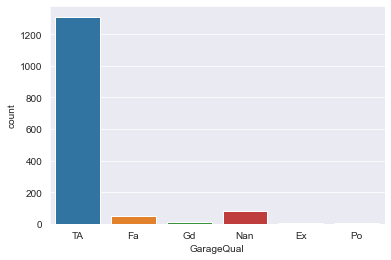

In [37]:
sns.countplot(df['GarageQual'])
plt.show()

In [38]:
df["GarageQual"].replace(["TA", "Fa", "Gd", "Nan", "Ex", "Po"],[3, 2, 4, 0, 5, 1],inplace=True)

In [39]:
df["GarageType"].replace(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'Nan', 'Basment', "2Types" ],[5, 1, 3, 2, 0, 4, 6 ],inplace=True)

C:\Users\visit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


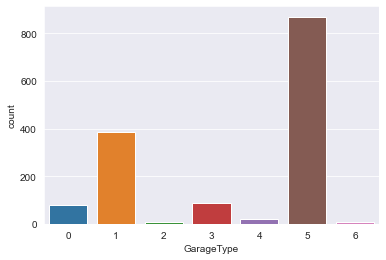

In [40]:
sns.countplot(df["GarageType"])
plt.show()

In [41]:
df['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', 'Nan'], dtype=object)

C:\Users\visit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


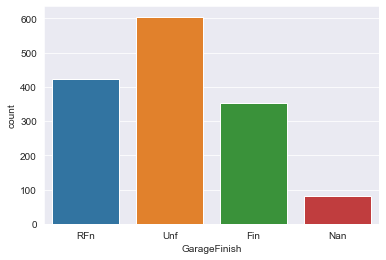

In [42]:
sns.countplot(df['GarageFinish']);

In [43]:
df["GarageFinish"].replace(["RFn", "Unf", "Fin", "Nan"],[2, 1, 3, 0],inplace=True)

In [44]:
df["GarageCond"].replace(["Ex", "Gd", "TA", "Fa", "Po", "Nan"],[5, 4, 3, 2, 1, 0],inplace=True)

In [45]:
df['Garage_score'] = df['GarageFinish'] + df['GarageCond'] + df['GarageType'] + df['GarageQual']

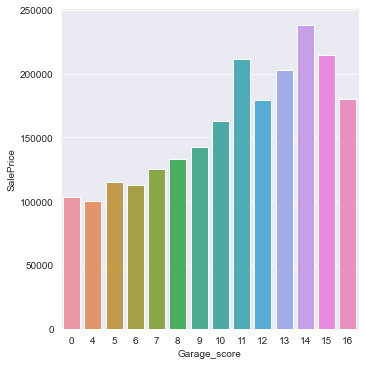

In [46]:
sns.catplot(x="Garage_score", y="SalePrice", data=df, kind="bar", ci=None);

In [47]:
df.drop(labels=['GarageFinish', 'GarageType', 'GarageCond', 'GarageQual'], axis=1, inplace=True)

C:\Users\visit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BsmtQual', ylabel='count'>

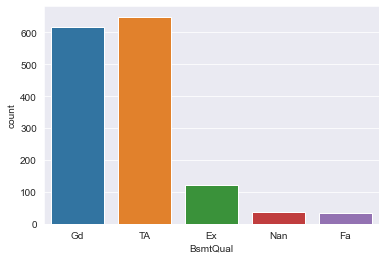

In [48]:
sns.countplot(df['BsmtQual'])

In [49]:
df['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', 'Nan'], dtype=object)

In [50]:
df['BsmtQual'].replace(['Gd', 'TA', 'Ex', 'Nan', 'Fa'], [3, 2, 4, 0, 1], inplace=True)

In [51]:
df['BsmtCond'].replace(['Gd', 'TA', 'Po', 'Nan', 'Fa'], [4, 3, 1, 0, 2], inplace=True)

In [52]:
df['BsmtExposure'].replace(['Nan', 'No', 'Mn', 'Av', 'Gd'], [0, 1, 2, 3, 4], inplace=True)

In [53]:
df['BsmtFinType1'].replace(['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'Nan'], [6, 5, 4, 3, 2, 1, 0], inplace=True)

In [54]:
df['BsmtFinType2'].replace(['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'Nan'], [6, 5, 4, 3, 2, 1, 0], inplace=True)

In [55]:
df['Electrical'].replace(['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix', 'Nan'], [4, 3, 2, 1, 4, 0], inplace=True)

In [56]:
df["bsmt_score"] = df['Electrical'] + df['BsmtQual'] + df['BsmtCond'] + df['BsmtExposure'] + df['BsmtFinType1'] + df['BsmtFinType2']

In [57]:
df.drop(labels=['Electrical', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'], axis=1, inplace=True)

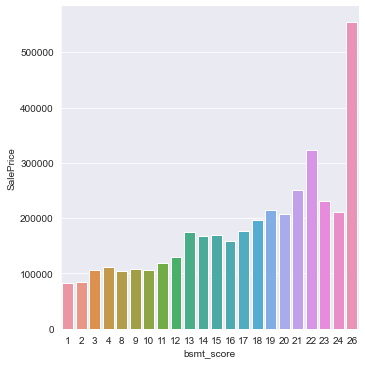

In [59]:
sns.catplot(x='bsmt_score', y="SalePrice", data=df, kind='bar', ci=False);

In [60]:
df.drop(labels=['Id', 'MSSubClass', 'OverallCond', 'BsmtFinSF1', 'LowQualFinSF', 'BsmtHalfBath', 'BsmtFullBath', 'KitchenAbvGr', 'EnclosedPorch', 'BsmtFinSF2', 'MiscVal'], axis=1, inplace=True)

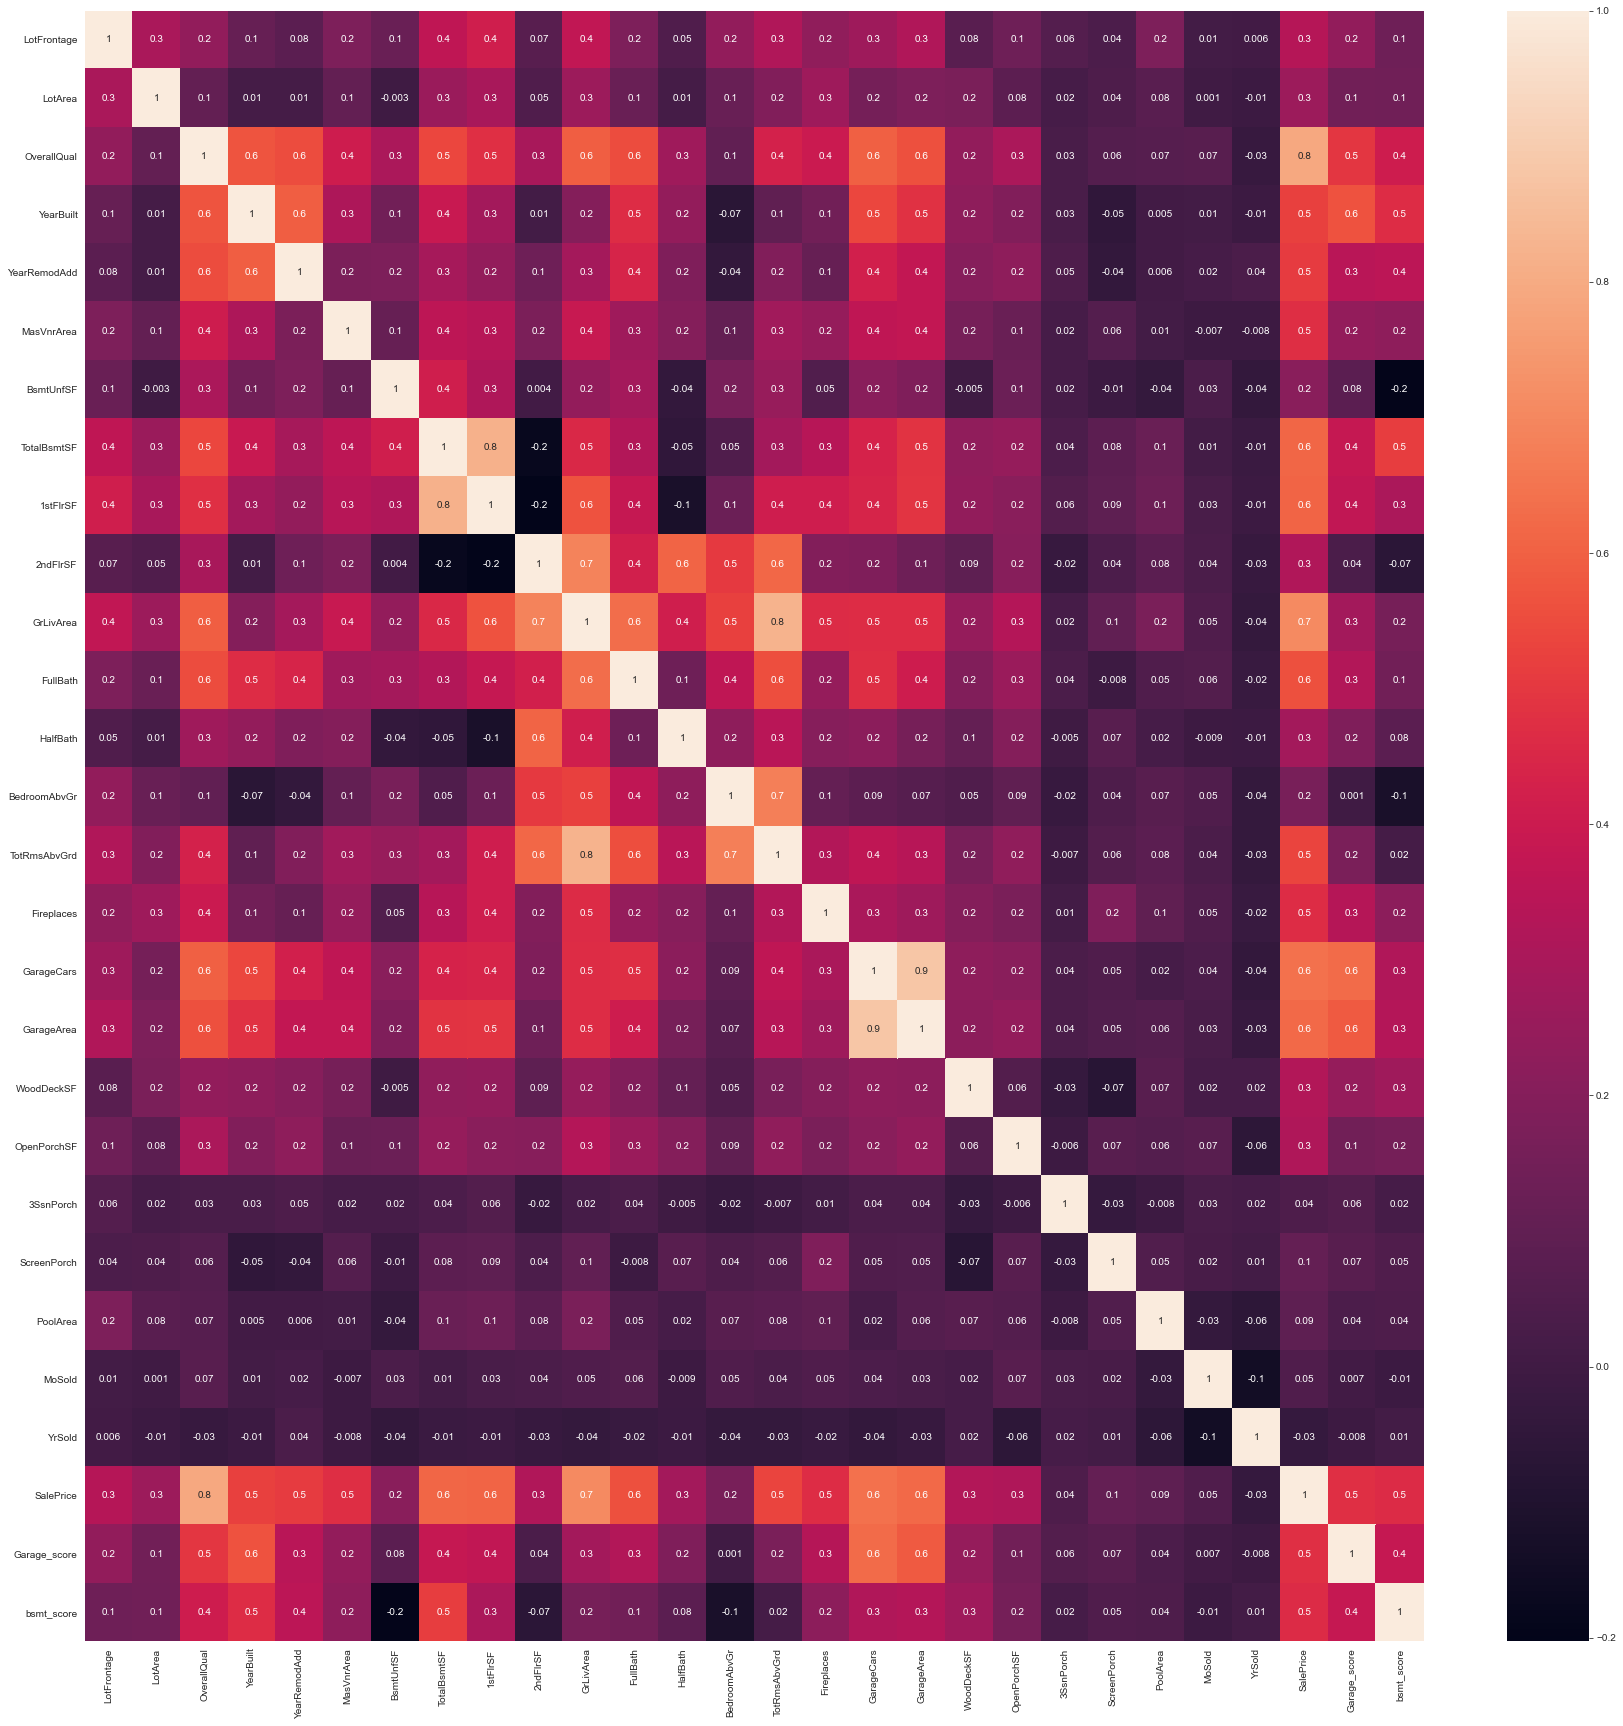

In [61]:
corr_matrix2 = df.corr()
plt.figure(figsize=(30, 30))

sns.heatmap(corr_matrix2, annot=True, fmt= '.1g');

In [62]:
encorded_df = pd.get_dummies(df)

In [63]:
encorded_df.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65,8450,7,2003,2003,196.0,150,856,856,854,...,0,0,0,1,0,0,0,0,1,0
1,80,9600,6,1976,1976,0.0,284,1262,1262,0,...,0,0,0,1,0,0,0,0,1,0
2,68,11250,7,2001,2002,162.0,434,920,920,866,...,0,0,0,1,0,0,0,0,1,0
3,60,9550,7,1915,1970,0.0,540,756,961,756,...,0,0,0,1,1,0,0,0,0,0
4,84,14260,8,2000,2000,350.0,490,1145,1145,1053,...,0,0,0,1,0,0,0,0,1,0


In [64]:
from sklearn.model_selection import train_test_split

x = encorded_df.drop('SalePrice', axis=1)
y = encorded_df['SalePrice']

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

from sklearn.ensemble import AdaBoostClassifier


clf = AdaBoostClassifier()

clf.fit(x_train, y_train)

AdaBoostClassifier()

In [72]:
clf.score(x_test, y_test) #unsuccesful

0.010273972602739725

In [75]:
from sklearn.ensemble import RandomForestClassifier

cls = RandomForestClassifier()

cls.fit(x_train, y_train)

cls.score(x_test, y_test)

0.0273972602739726

In [77]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
rlf = GradientBoostingRegressor()
rlf.fit(x_train,y_train)
rlf.score(x_test,y_test),np.mean(cross_val_score(rlf,x,y))

(0.9116806300790815, 0.8841206245513729)